In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [71]:
from __future__ import division
from deltasigma import *
import numpy as np
from scipy import signal

### Parametros caracteristicos del ADS1292

In [90]:
ADS1292_clk = 512000        #Frecuencia reloj interno
fmod = 128000               #Frecuencia de muestreo de la modulacion sigma delta

fB = 60                     #frecuencia maxima de la señal de entrada (testeo)  
ftest = 60                  #Frecuencias para formar la senal de entrada (testeo)

### Instancia de la modulacion Delta-Sigma

In [91]:
OSR = int(fmod/(2*fB))
print("OSR: ", OSR)
order = 2
    
H = synthesizeNTF(order, OSR, 1)

OSR:  1066


Text(0.5,1,'Modulator Input & Output')

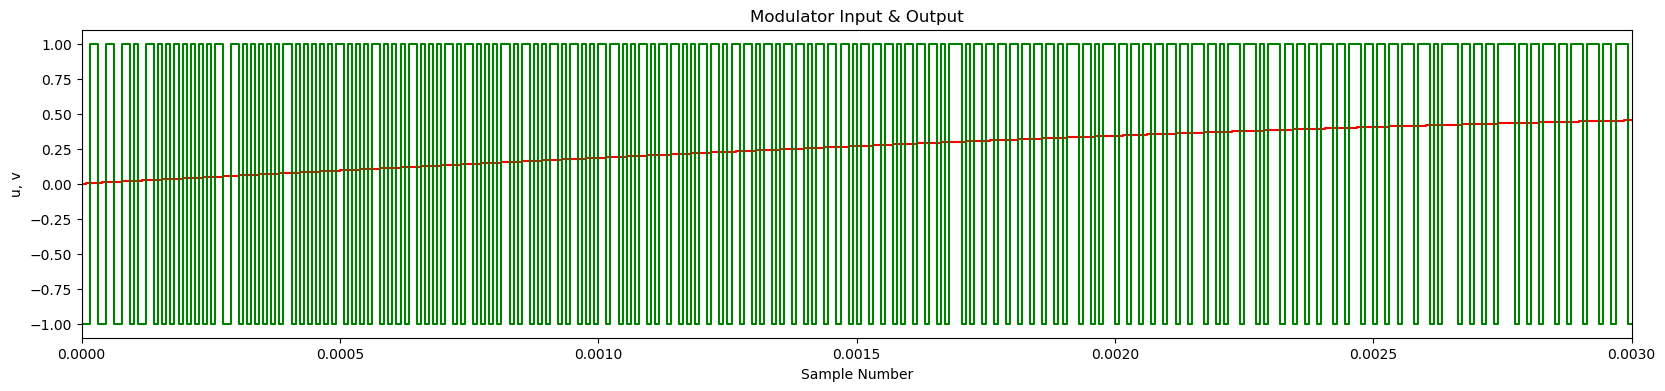

In [93]:
N = 128000
t = np.linspace(0, N/fmod, N)
u = 0.5*np.sin(2*np.pi*ftest*t)      #Senal de testeo

#plt.figure(figsize=(20, 4))
#plt.xlim((0, 0.05))
#plt.step(t,u)
#plt.show()

plt.figure(figsize=(20, 4))
v, xn, xmax, y = simulateDSM(u, H)
#t = np.arange(N)
plt.step(t, u,'r')
plt.step(t, v, 'g')
plt.xlim((0,0.003))
plt.xlabel('Sample Number')
plt.ylabel('u, v')
plt.title('Modulator Input & Output')

-0.24560546875
-0.5078125
-16640.0


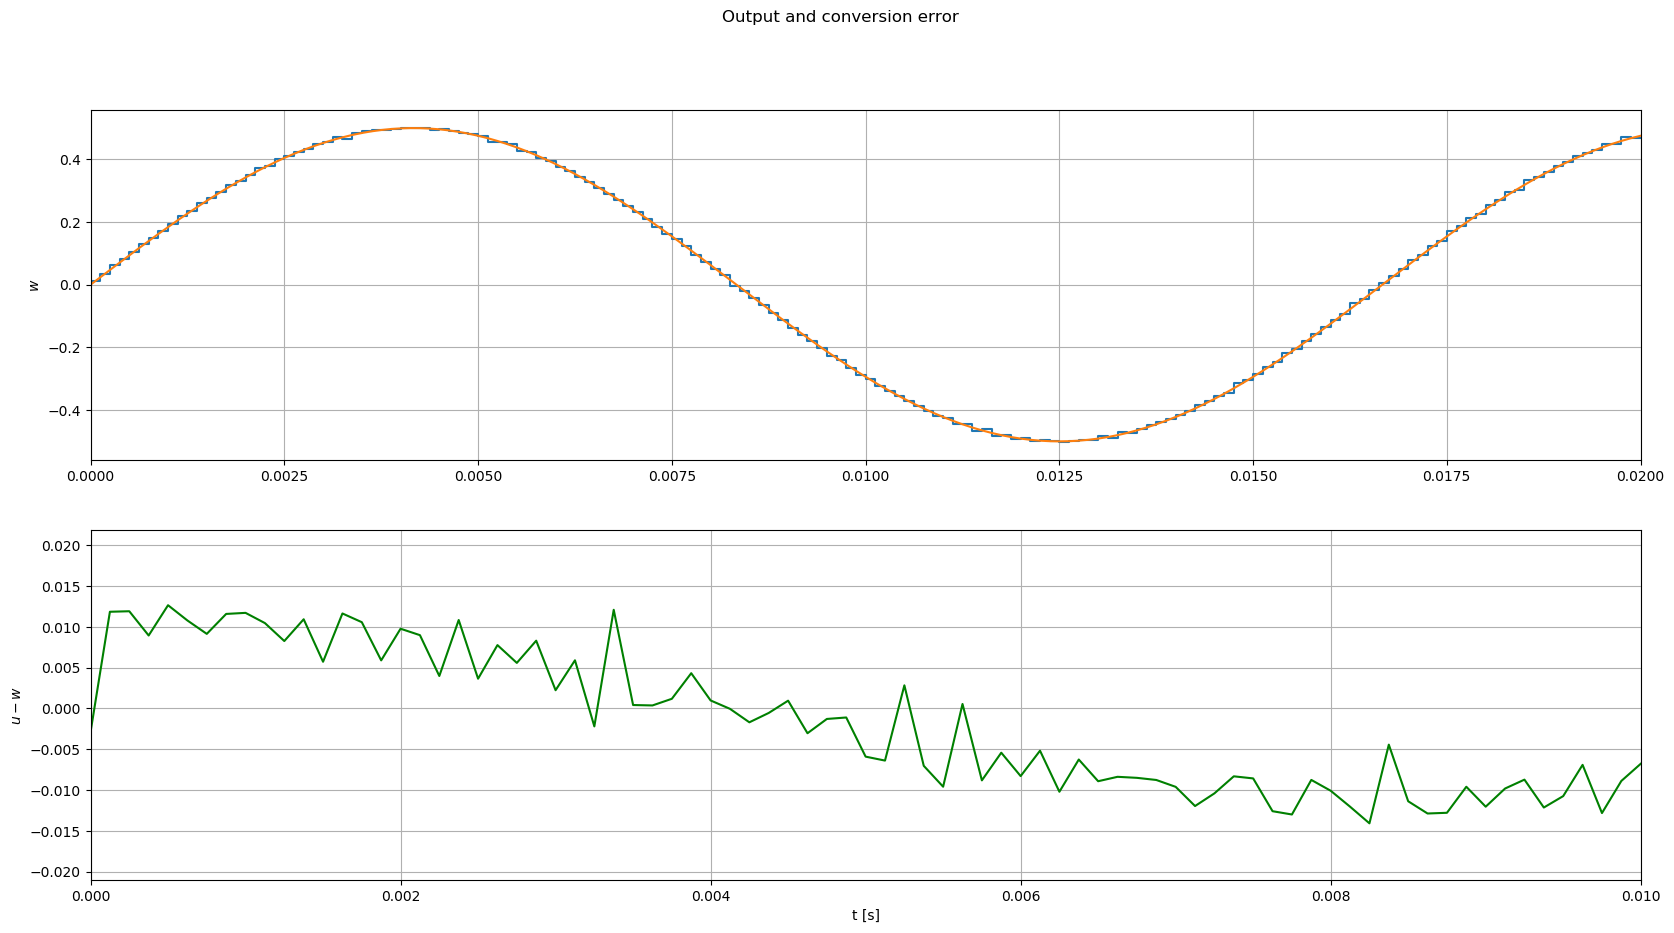

In [95]:
DecFact = 16

ydem = sinc_decimate(v, 3, DecFact)
#ydem = signal.decimate(v, 20)
Ndem = max(ydem.shape)
t = np.linspace(0, Ndem/(fmod/DecFact), Ndem)
plt.subplot(211)
plt.step(t, ydem)
plt.plot(t, u[::DecFact])
plt.ylabel('$w$')
plt.xlim((0,0.02))
figureMagic(size=(20, 10))
plt.subplot(212)
plt.plot(t, u[::DecFact] - ydem, 'g')
plt.ylabel('$u-w$')
plt.xlabel('t [s]')
figureMagic(size=(20, 10))
plt.xlim((0,0.01))
plt.suptitle('Output and conversion error')

print(ydem[123])
print(np.min(ydem))
print(np.min(ydem)*32768)

SyntaxError: invalid syntax (102955799.py, line 9)

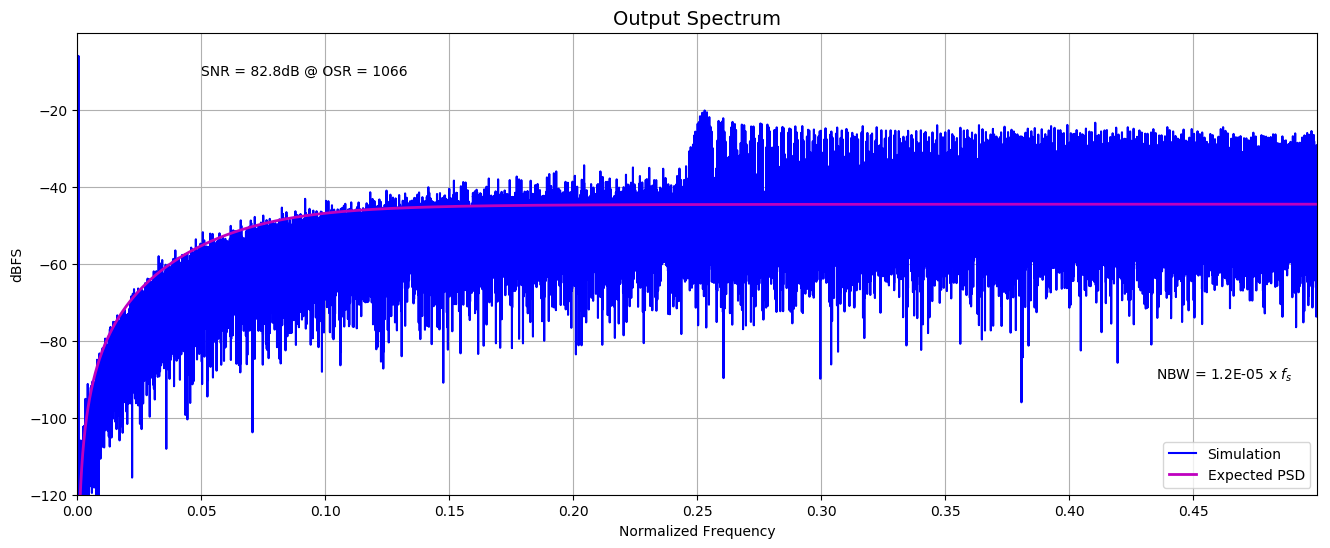

In [96]:
f = np.linspace(0, 0.5, N//2 + 1)
spec = np.fft.fft(v * ds_hann(N))/(N/4)
plt.plot(f, dbv(spec[:N//2 + 1]),'b', label='Simulation')
figureMagic([0, 0.5], 0.05, None, [-120, 0], 20, None, (16, 6), 'Output Spectrum')
plt.xlabel('Normalized Frequency')
plt.ylabel('dBFS')
snr = calculateSNR(spec[2:fB+1], ftest - 2)
plt.text(0.05, -10, 'SNR = %4.1fdB @ OSR = %d' % (snr, OSR), verticalalignment='center')
NBW = 1.5/N
Sqq = 4*evalTF(H, np.exp(2j*np.pi*f)) ** 2/3.
plt.plot(f, dbp(Sqq * NBW), 'm', linewidth=2, label='Expected PSD')
plt.text(0.49, -90, 'NBW = %4.1E x $f_s$' % NBW, horizontalalignment='right')
plt.legend(loc=4);